In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

# GAINING BASIC INFO ABOUT THE DATASET

In [3]:
df =  pd.read_csv('Chennai houseing sale.csv')
df.shape

(7109, 22)

In [4]:
df.nunique()

PRT_ID           7109
AREA               17
INT_SQFT         1699
DATE_SALE        2798
DIST_MAINROAD     201
N_BEDROOM           4
N_BATHROOM          2
N_ROOM              5
SALE_COND           9
PARK_FACIL          3
DATE_BUILD       5808
BUILDTYPE           5
UTILITY_AVAIL       5
STREET              5
MZZONE              6
QS_ROOMS           31
QS_BATHROOM        31
QS_BEDROOM         31
QS_OVERALL        479
REG_FEE          7038
COMMIS           7011
SALES_PRICE      7057
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

# DATA CLEANING

In [6]:
df.isnull().values.any()

True

In [7]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

# DROPPING THE NULL VALUES

In [8]:
final_df = df.dropna()

In [9]:
final_df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

# STANDARDISING TEXT

In [10]:
final_df.columns = final_df.columns.str.lower()

In [11]:
final_df['area'] = final_df['area'].str.lower()
final_df['area'].replace({'velchery':'velachery', 
                       'kknagar':'kk nagar', 
                       'tnagar':'t nagar', 
                       'chormpet':'chrompet', 
                       'chrompt':'chrompet', 
                       'chrmpet':'chrompet', 
                       'ana nagar':'anna nagar', 
                       'ann nagar':'anna nagar',
                       'karapakam':'karapakkam', 
                       'adyr':'adyar'}, inplace=True)

In [12]:
final_df['park_facil'].replace(['Noo'],'No',inplace=True)
final_df['park_facil'] = final_df['park_facil'].str.lower()

In [13]:
final_df['utility_avail'].replace({'All Pub':'AllPub',
                              'NoSeWa':'NoSewr',
                              'NoSewr ':'NoSewr'},inplace=True)
final_df['utility_avail'] = final_df['utility_avail'].str.lower()

In [14]:
final_df['buildtype'].replace({'Others':'Other',
                          'Comercial':'Commercial'},inplace=True)
final_df['buildtype'] = final_df['buildtype'].str.lower()

In [15]:
final_df['street'].replace({'Pavd':'Paved',
                          'NoAccess':'No Access'},inplace=True)
final_df['street'] = final_df['street'].str.lower()

In [16]:
final_df['mzzone'] = final_df['mzzone'].str.lower()

In [17]:
final_df.nunique()

prt_id           7056
area                7
int_sqft         1698
date_sale        2794
dist_mainroad     201
n_bedroom           4
n_bathroom          2
n_room              5
sale_cond           9
park_facil          2
date_build       5773
buildtype           3
utility_avail       3
street              3
mzzone              6
qs_rooms           31
qs_bathroom        31
qs_bedroom         31
qs_overall        479
reg_fee          6986
commis           6960
sales_price      7005
dtype: int64

# Changing date column type from object to date time format

In [18]:
final_df['date_sale'] = pd.to_datetime(final_df['date_sale'], format='%d-%m-%Y')
final_df['date_build'] = pd.to_datetime(final_df['date_build'], format='%d-%m-%Y')
final_df[['date_sale','date_build']]

date_sale date_build
0    2011-05-04 1967-05-15
1    2006-12-19 1995-12-22
2    2012-02-04 1992-02-09
3    2010-03-13 1988-03-18
4    2009-10-05 1979-10-13
...         ...        ...
7104 2011-01-03 1962-01-15
7105 2004-04-08 1995-04-11
7106 2006-08-25 1978-09-01
7107 2009-08-03 1977-08-11
7108 2005-07-13 1961-07-24

[7056 rows x 2 columns]

# COMBINING SOME COLUMNS

In [19]:
final_df['property_age'] = pd.DatetimeIndex(final_df['date_sale'] ).year - pd.DatetimeIndex(final_df['date_build']).year

In [20]:
final_df['total_price'] = final_df['reg_fee'] + final_df['commis'] + final_df['sales_price']

In [21]:
final_df[['property_age','total_price']]

property_age  total_price
0               44      8124400
1               11     22781941
2               20     13672408
3               22     10063653
4               30      7717313
...            ...          ...
7104            49      5668827
7105             9     11370222
7106            28      8835792
7107            32      9051448
7108            44     10405469

[7056 rows x 2 columns]

In [22]:
final_df = final_df.drop(["prt_id"], axis = 1)

In [23]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7056 entries, 0 to 7108
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   area           7056 non-null   object        
 1   int_sqft       7056 non-null   int64         
 2   date_sale      7056 non-null   datetime64[ns]
 3   dist_mainroad  7056 non-null   int64         
 4   n_bedroom      7056 non-null   float64       
 5   n_bathroom     7056 non-null   float64       
 6   n_room         7056 non-null   int64         
 7   sale_cond      7056 non-null   object        
 8   park_facil     7056 non-null   object        
 9   date_build     7056 non-null   datetime64[ns]
 10  buildtype      7056 non-null   object        
 11  utility_avail  7056 non-null   object        
 12  street         7056 non-null   object        
 13  mzzone         7056 non-null   object        
 14  qs_rooms       7056 non-null   float64       
 15  qs_bathroom    7056 non-nu

# EXPLORATORY DATA ANALYSIS

In [24]:
numerical_data  = final_df[['total_price','reg_fee','commis','sales_price','int_sqft', 'property_age','qs_overall']]

categorical_data = final_df[['area','sale_cond', 'park_facil',
       'buildtype', 'utility_avail', 'street', 'mzzone','dist_mainroad', 'n_bedroom','n_bathroom', 'n_room', 
       'qs_rooms', 'qs_bathroom', 'qs_bedroom']]

In [25]:
import matplotlib.pyplot as plt

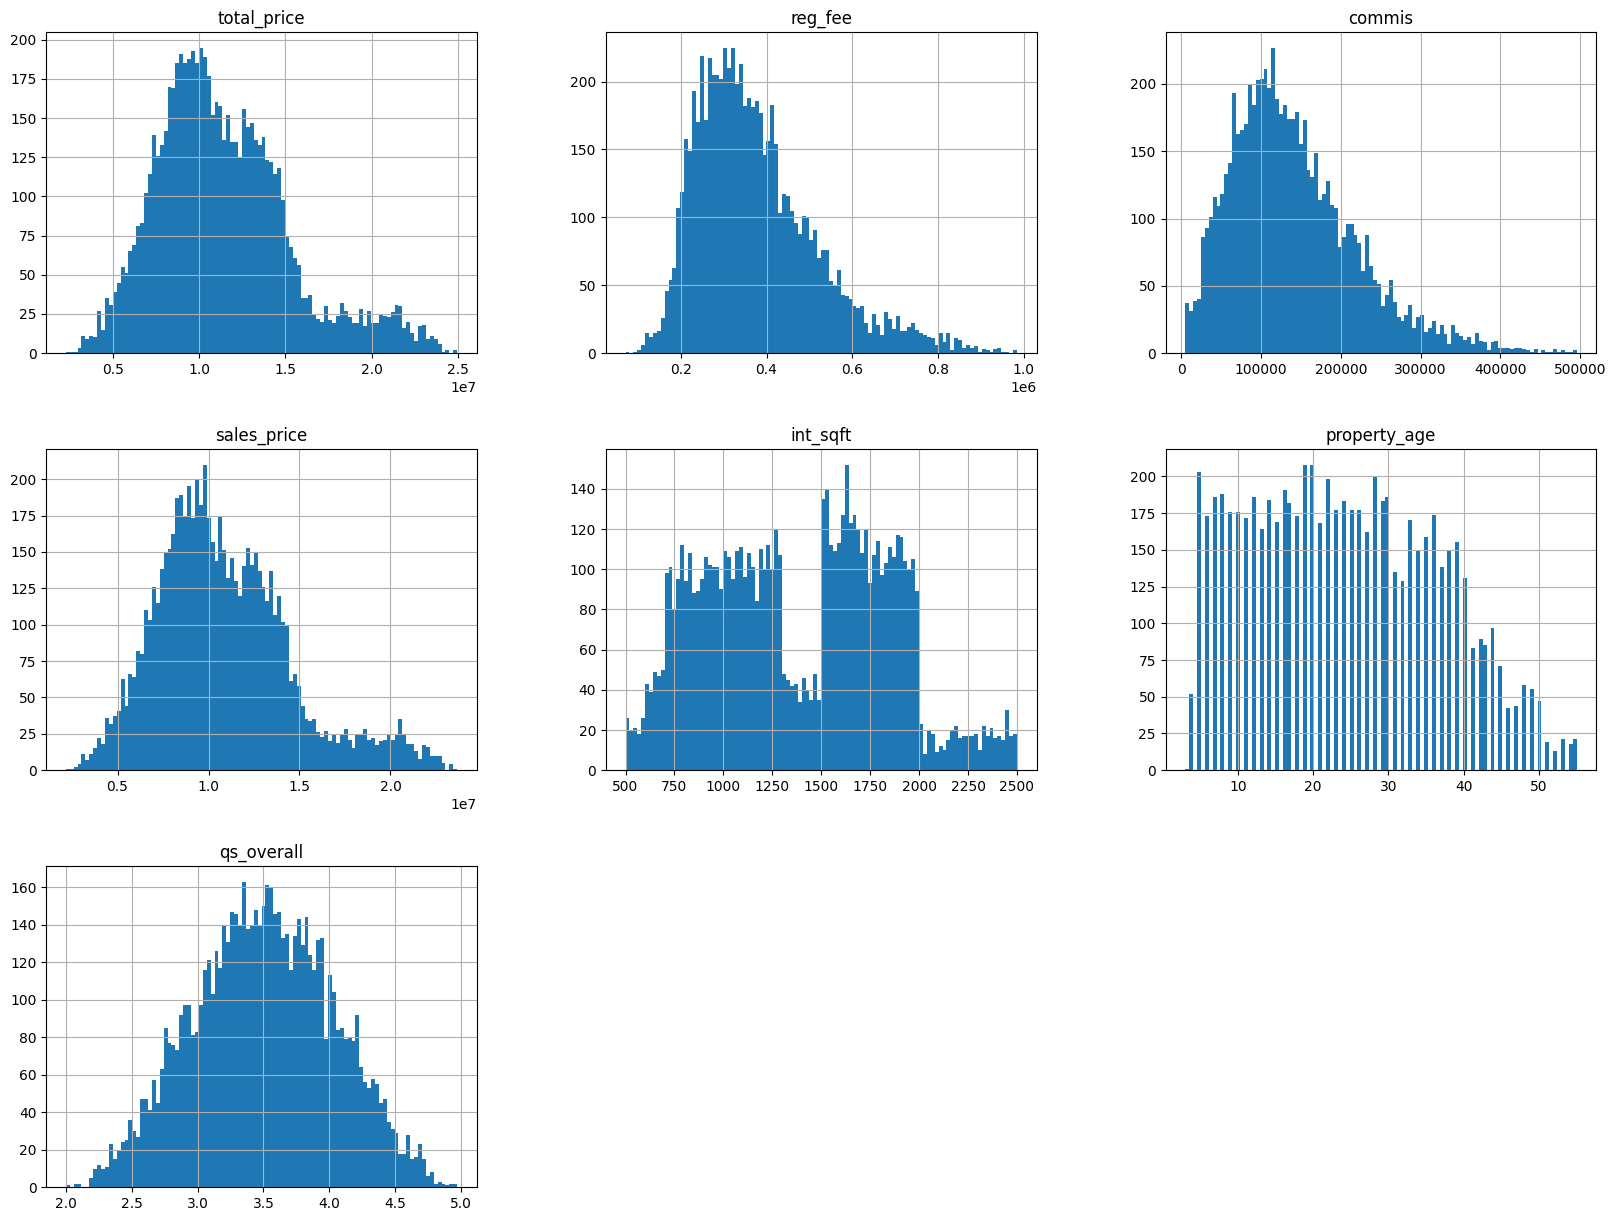

In [26]:
%matplotlib inline 
numerical_data.hist(bins=100,figsize=(20,15))
plt.show()

In [27]:
# The total price/sales price , commision fee and registration fee are right skewed(positive). Hence we use log transformation to relax these assumptions.

array([[<Axes: title={'center': 'dist_mainroad'}>,
        <Axes: title={'center': 'n_bedroom'}>,
        <Axes: title={'center': 'n_bathroom'}>],
       [<Axes: title={'center': 'n_room'}>,
        <Axes: title={'center': 'qs_rooms'}>,
        <Axes: title={'center': 'qs_bathroom'}>],
       [<Axes: title={'center': 'qs_bedroom'}>, <Axes: >, <Axes: >]],
      dtype=object)

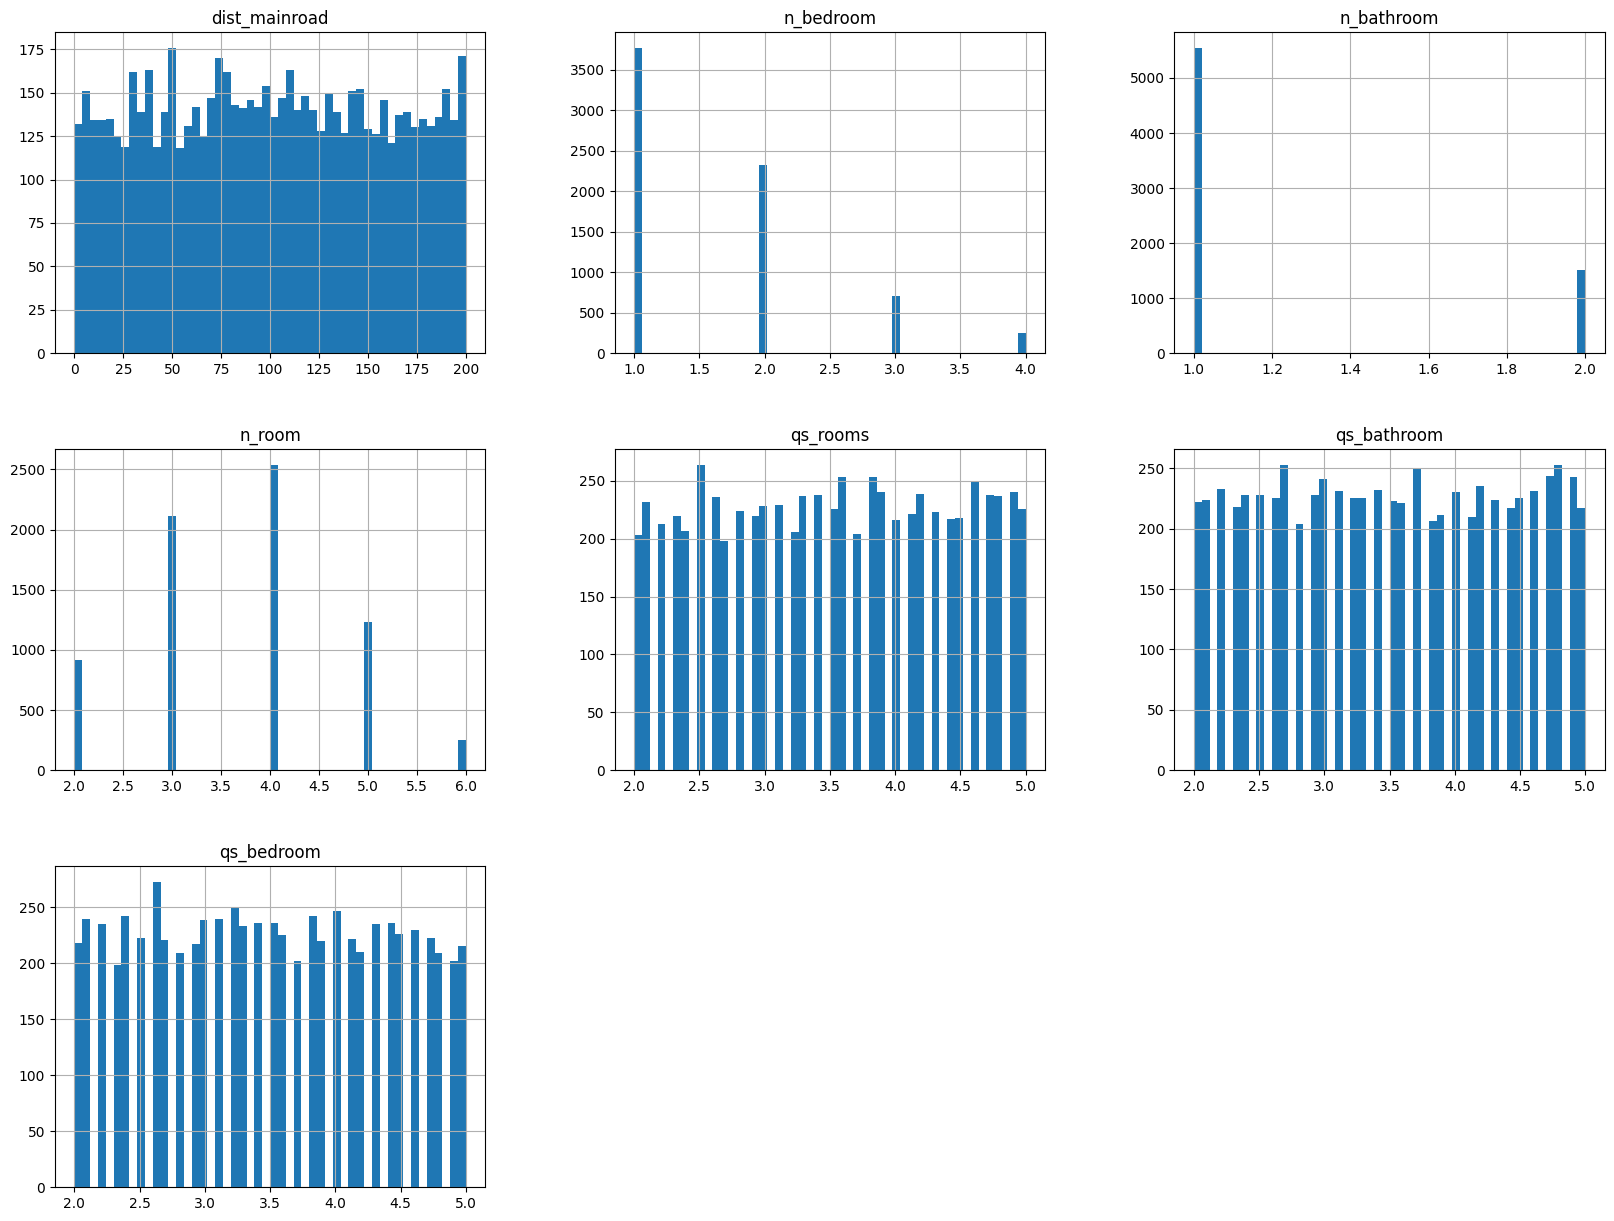

In [28]:
categorical_data.hist(bins=50,figsize=(20,15))

In [29]:
# Most of the categorical features are normally distributed

In [30]:
import seaborn as sns
sns.set()

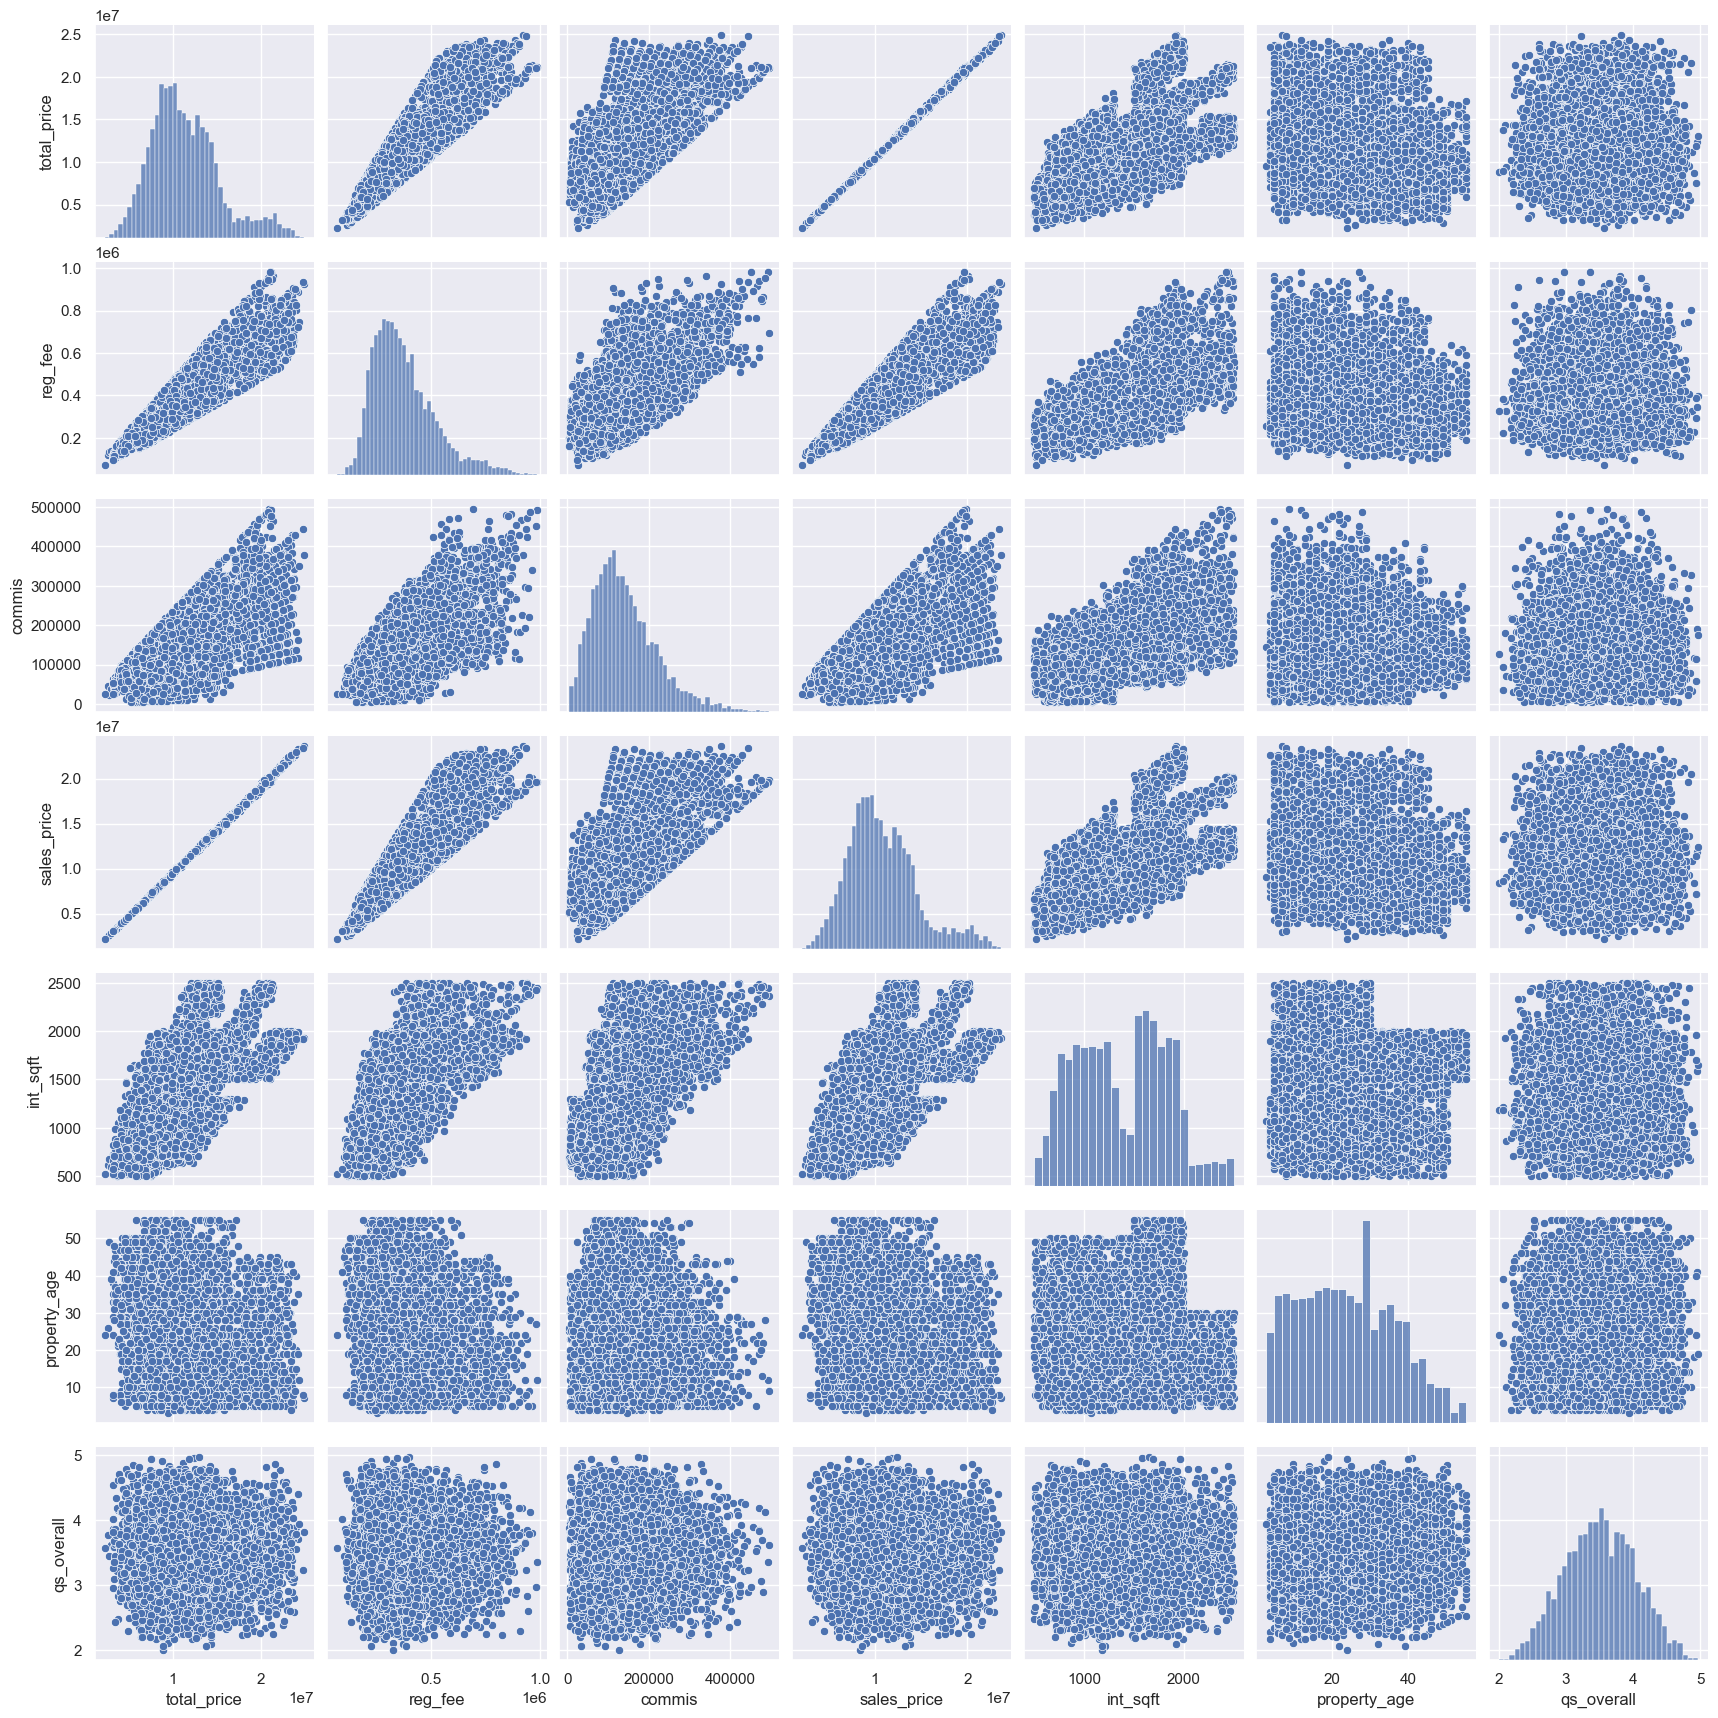

In [31]:
sns.pairplot(data=numerical_data)

In [32]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7056 entries, 0 to 7108
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   area           7056 non-null   object        
 1   int_sqft       7056 non-null   int64         
 2   date_sale      7056 non-null   datetime64[ns]
 3   dist_mainroad  7056 non-null   int64         
 4   n_bedroom      7056 non-null   float64       
 5   n_bathroom     7056 non-null   float64       
 6   n_room         7056 non-null   int64         
 7   sale_cond      7056 non-null   object        
 8   park_facil     7056 non-null   object        
 9   date_build     7056 non-null   datetime64[ns]
 10  buildtype      7056 non-null   object        
 11  utility_avail  7056 non-null   object        
 12  street         7056 non-null   object        
 13  mzzone         7056 non-null   object        
 14  qs_rooms       7056 non-null   float64       
 15  qs_bathroom    7056 non-nu

In [33]:
log_price = np.log(final_df['total_price'])

In [34]:
final_df['log_price'] = log_price
final_df

area  int_sqft  date_sale  dist_mainroad  n_bedroom  n_bathroom   
0     karapakkam      1004 2011-05-04            131        1.0         1.0  \
1     anna nagar      1986 2006-12-19             26        2.0         1.0   
2          adyar       909 2012-02-04             70        1.0         1.0   
3      velachery      1855 2010-03-13             14        3.0         2.0   
4     karapakkam      1226 2009-10-05             84        1.0         1.0   
...          ...       ...        ...            ...        ...         ...   
7104  karapakkam       598 2011-01-03             51        1.0         1.0   
7105   velachery      1897 2004-04-08             52        3.0         2.0   
7106   velachery      1614 2006-08-25            152        2.0         1.0   
7107  karapakkam       787 2009-08-03             40        1.0         1.0   
7108   velachery      1896 2005-07-13            156        3.0         2.0   

      n_room    sale_cond park_facil date_build  ... qs_rooms qs_bathroom   
0          3     AbNormal        yes 1967-05-15  ...      4.0         3.9  \
1          5     AbNormal         no 1995-12-22  ...      4.9         4.2   
2          3     AbNormal        yes 1992-02-09  ...      4.1         3.8   
3          5       Family         no 1988-03-18  ...      4.7         3.9   
4          3     AbNormal        yes 1979-10-13  ...      3.0         2.5   
...      ...          ...        ...        ...  ...      ...         ...   
7104       2      AdjLand         no 1962-01-15  ...      3.0         2.2   
7105       5       Family        yes 1995-04-11  ...      3.6         4.5   
7106       4  Normal Sale         no 1978-09-01  ...      4.3         4.2   
7107       2      Partial        yes 1977-08-11  ...      4.6         3.8   
7108       5      Partial        yes 1961-07-24  ...      3.1         3.5   

     qs_bedroom qs_overall  reg_fee  commis  sales_price  property_age   
0           4.9      4.330   380000  144400      7600000            44  \
1           2.5      3.765   760122  304049     21717770            11   
2           2.2      3.090   421094   92114     13159200            20   
3           3.6      4.010   356321   77042      9630290            22   
4           4.1      3.290   237000   74063      7406250            30   
...         ...        ...      ...     ...          ...           ...   
7104        2.4      2.520   208767  107060      5353000            49   
7105        3.3      3.920   346191  205551     10818480             9   
7106        2.9      3.840   317354  167028      8351410            28   
7107        4.1      4.160   425350  119098      8507000            32   
7108        4.3      3.640   349177   79812      9976480            44   

      total_price  log_price  
0         8124400  15.910382  
1        22781941  16.941479  
2        13672408  16.430890  
3        10063653  16.124441  
4         7717313  15.858977  
...           ...        ...  
7104      5668827  15.550493  
7105     11370222  16.246508  
7106      8835792  15.994321  
7107      9051448  16.018435  
7108     10405469  16.157842  

[7056 rows x 24 columns]

In [35]:
final_df = final_df.drop(['total_price'],axis=1)

In [36]:
final_df

area  int_sqft  date_sale  dist_mainroad  n_bedroom  n_bathroom   
0     karapakkam      1004 2011-05-04            131        1.0         1.0  \
1     anna nagar      1986 2006-12-19             26        2.0         1.0   
2          adyar       909 2012-02-04             70        1.0         1.0   
3      velachery      1855 2010-03-13             14        3.0         2.0   
4     karapakkam      1226 2009-10-05             84        1.0         1.0   
...          ...       ...        ...            ...        ...         ...   
7104  karapakkam       598 2011-01-03             51        1.0         1.0   
7105   velachery      1897 2004-04-08             52        3.0         2.0   
7106   velachery      1614 2006-08-25            152        2.0         1.0   
7107  karapakkam       787 2009-08-03             40        1.0         1.0   
7108   velachery      1896 2005-07-13            156        3.0         2.0   

      n_room    sale_cond park_facil date_build  ... mzzone qs_rooms   
0          3     AbNormal        yes 1967-05-15  ...      a      4.0  \
1          5     AbNormal         no 1995-12-22  ...     rh      4.9   
2          3     AbNormal        yes 1992-02-09  ...     rl      4.1   
3          5       Family         no 1988-03-18  ...      i      4.7   
4          3     AbNormal        yes 1979-10-13  ...      c      3.0   
...      ...          ...        ...        ...  ...    ...      ...   
7104       2      AdjLand         no 1962-01-15  ...     rm      3.0   
7105       5       Family        yes 1995-04-11  ...     rh      3.6   
7106       4  Normal Sale         no 1978-09-01  ...      i      4.3   
7107       2      Partial        yes 1977-08-11  ...     rl      4.6   
7108       5      Partial        yes 1961-07-24  ...      i      3.1   

     qs_bathroom qs_bedroom  qs_overall  reg_fee  commis  sales_price   
0            3.9        4.9       4.330   380000  144400      7600000  \
1            4.2        2.5       3.765   760122  304049     21717770   
2            3.8        2.2       3.090   421094   92114     13159200   
3            3.9        3.6       4.010   356321   77042      9630290   
4            2.5        4.1       3.290   237000   74063      7406250   
...          ...        ...         ...      ...     ...          ...   
7104         2.2        2.4       2.520   208767  107060      5353000   
7105         4.5        3.3       3.920   346191  205551     10818480   
7106         4.2        2.9       3.840   317354  167028      8351410   
7107         3.8        4.1       4.160   425350  119098      8507000   
7108         3.5        4.3       3.640   349177   79812      9976480   

      property_age  log_price  
0               44  15.910382  
1               11  16.941479  
2               20  16.430890  
3               22  16.124441  
4               30  15.858977  
...            ...        ...  
7104            49  15.550493  
7105             9  16.246508  
7106            28  15.994321  
7107            32  16.018435  
7108            44  16.157842  

[7056 rows x 23 columns]

In [37]:
data_vif = final_df.drop(['log_price'],axis=1)

In [38]:
import statsmodels.api as sm

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Check for multi collinearity

In [40]:
data_vif.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7056 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   area           7056 non-null   object        
 1   int_sqft       7056 non-null   int64         
 2   date_sale      7056 non-null   datetime64[ns]
 3   dist_mainroad  7056 non-null   int64         
 4   n_bedroom      7056 non-null   float64       
 5   n_bathroom     7056 non-null   float64       
 6   n_room         7056 non-null   int64         
 7   sale_cond      7056 non-null   object        
 8   park_facil     7056 non-null   object        
 9   date_build     7056 non-null   datetime64[ns]
 10  buildtype      7056 non-null   object        
 11  utility_avail  7056 non-null   object        
 12  street         7056 non-null   object        
 13  mzzone         7056 non-null   object        
 14  qs_rooms       7056 non-null   float64       
 15  qs_bathroom    7056 non-nu

In [41]:
variables = data_vif[['property_age','int_sqft','dist_mainroad','n_bedroom', 'n_bathroom', 'n_room',
       'qs_rooms', 'qs_bathroom', 'qs_bedroom', 'qs_overall']]

In [42]:
vif = pd.DataFrame()

In [43]:
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

In [44]:
vif["Features"] = variables.columns

In [45]:
vif

VIF       Features
0     4.680368   property_age
1   105.175602       int_sqft
2     3.850612  dist_mainroad
3    25.030971      n_bedroom
4    21.542059     n_bathroom
5   169.253012         n_room
6   141.969056       qs_rooms
7   163.972083    qs_bathroom
8   212.228383     qs_bedroom
9  1364.589890     qs_overall

In [46]:
final_df = final_df.drop(['qs_bedroom','qs_overall','qs_bathroom','qs_rooms'],axis=1)
final_df

area  int_sqft  date_sale  dist_mainroad  n_bedroom  n_bathroom   
0     karapakkam      1004 2011-05-04            131        1.0         1.0  \
1     anna nagar      1986 2006-12-19             26        2.0         1.0   
2          adyar       909 2012-02-04             70        1.0         1.0   
3      velachery      1855 2010-03-13             14        3.0         2.0   
4     karapakkam      1226 2009-10-05             84        1.0         1.0   
...          ...       ...        ...            ...        ...         ...   
7104  karapakkam       598 2011-01-03             51        1.0         1.0   
7105   velachery      1897 2004-04-08             52        3.0         2.0   
7106   velachery      1614 2006-08-25            152        2.0         1.0   
7107  karapakkam       787 2009-08-03             40        1.0         1.0   
7108   velachery      1896 2005-07-13            156        3.0         2.0   

      n_room    sale_cond park_facil date_build   buildtype utility_avail   
0          3     AbNormal        yes 1967-05-15  commercial        allpub  \
1          5     AbNormal         no 1995-12-22  commercial        allpub   
2          3     AbNormal        yes 1992-02-09  commercial           elo   
3          5       Family         no 1988-03-18       other        nosewr   
4          3     AbNormal        yes 1979-10-13       other        allpub   
...      ...          ...        ...        ...         ...           ...   
7104       2      AdjLand         no 1962-01-15       other           elo   
7105       5       Family        yes 1995-04-11       other        nosewr   
7106       4  Normal Sale         no 1978-09-01       house        nosewr   
7107       2      Partial        yes 1977-08-11  commercial           elo   
7108       5      Partial        yes 1961-07-24       other           elo   

         street mzzone  reg_fee  commis  sales_price  property_age  log_price  
0         paved      a   380000  144400      7600000            44  15.910382  
1        gravel     rh   760122  304049     21717770            11  16.941479  
2        gravel     rl   421094   92114     13159200            20  16.430890  
3         paved      i   356321   77042      9630290            22  16.124441  
4        gravel      c   237000   74063      7406250            30  15.858977  
...         ...    ...      ...     ...          ...           ...        ...  
7104  no access     rm   208767  107060      5353000            49  15.550493  
7105  no access     rh   346191  205551     10818480             9  16.246508  
7106     gravel      i   317354  167028      8351410            28  15.994321  
7107      paved     rl   425350  119098      8507000            32  16.018435  
7108      paved      i   349177   79812      9976480            44  16.157842  

[7056 rows x 19 columns]

In [47]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7056 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   area           7056 non-null   object        
 1   int_sqft       7056 non-null   int64         
 2   date_sale      7056 non-null   datetime64[ns]
 3   dist_mainroad  7056 non-null   int64         
 4   n_bedroom      7056 non-null   float64       
 5   n_bathroom     7056 non-null   float64       
 6   n_room         7056 non-null   int64         
 7   sale_cond      7056 non-null   object        
 8   park_facil     7056 non-null   object        
 9   date_build     7056 non-null   datetime64[ns]
 10  buildtype      7056 non-null   object        
 11  utility_avail  7056 non-null   object        
 12  street         7056 non-null   object        
 13  mzzone         7056 non-null   object        
 14  reg_fee        7056 non-null   int64         
 15  commis         7056 non-nu

# FEATURE SELECTION

In [48]:
final_df = final_df.drop(['date_build','date_sale',],axis=1)

In [54]:
final_df['area'].value_counts()

area
chrompet      1691
karapakkam    1359
kk nagar       990
velachery      975
anna nagar     777
adyar          769
t nagar        495
Name: count, dtype: int64

In [63]:
final_df['sale_cond'].value_counts()

sale_cond
AdjLand        1426
Normal Sale    1416
Partial        1414
AbNormal       1396
Family         1390
Adj Land          6
Ab Normal         5
Partiall          2
PartiaLl          1
Name: count, dtype: int64

In [64]:
final_df['park_facil'].value_counts()

park_facil
yes    3557
no     3499
Name: count, dtype: int64

In [65]:
final_df['buildtype'].value_counts()

buildtype
house         2433
other         2312
commercial    2311
Name: count, dtype: int64

In [66]:
final_df['utility_avail'].value_counts()

utility_avail
nosewr    3672
allpub    1875
elo       1509
Name: count, dtype: int64

In [67]:
final_df['street'].value_counts()

street
paved        2554
gravel       2502
no access    2000
Name: count, dtype: int64

In [68]:
final_df['mzzone'].value_counts()

mzzone
rl    1849
rh    1808
rm    1801
c      547
a      533
i      518
Name: count, dtype: int64

In [73]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7056 entries, 0 to 7108
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area           7056 non-null   object 
 1   int_sqft       7056 non-null   int64  
 2   dist_mainroad  7056 non-null   int64  
 3   n_bedroom      7056 non-null   float64
 4   n_bathroom     7056 non-null   float64
 5   n_room         7056 non-null   int64  
 6   sale_cond      7056 non-null   object 
 7   park_facil     7056 non-null   object 
 8   buildtype      7056 non-null   object 
 9   utility_avail  7056 non-null   object 
 10  street         7056 non-null   object 
 11  mzzone         7056 non-null   object 
 12  reg_fee        7056 non-null   int64  
 13  commis         7056 non-null   int64  
 14  sales_price    7056 non-null   int64  
 15  property_age   7056 non-null   int32  
 16  log_price      7056 non-null   float64
dtypes: float64(3), int32(1), int64(6), object(7)
memory usage

In [74]:
# using one hot encoding for categorical variables

In [75]:
from sklearn.preprocessing import LabelEncoder

In [76]:
le_area = LabelEncoder()
final_df['area'] = le_area.fit_transform(final_df['area'])
final_df['area'].dtype

dtype('int32')

In [77]:
le_sale_cond = LabelEncoder()
final_df['sale_cond'] = le_sale_cond.fit_transform(final_df['sale_cond'])
final_df['sale_cond'].dtype

dtype('int32')

In [78]:
le_park_facil = LabelEncoder()
final_df['park_facil'] = le_park_facil.fit_transform(final_df['park_facil'])
final_df['park_facil'].dtype

dtype('int32')

In [79]:
le_buildtype = LabelEncoder()
final_df['buildtype'] = le_buildtype.fit_transform(final_df['buildtype'])
final_df['buildtype'].dtype

dtype('int32')

In [80]:
le_utility_avail = LabelEncoder()
final_df['utility_avail'] = le_utility_avail.fit_transform(final_df['utility_avail'])
final_df['utility_avail'].dtype

dtype('int32')

In [81]:
le_street = LabelEncoder()
final_df['street'] = le_street.fit_transform(final_df['street'])
final_df['street'].dtype

dtype('int32')

In [82]:
 le_mzzone = LabelEncoder()
final_df['mzzone'] = le_mzzone.fit_transform(final_df['mzzone'])
final_df['mzzone'].dtype

dtype('int32')

In [83]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7056 entries, 0 to 7108
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area           7056 non-null   int32  
 1   int_sqft       7056 non-null   int64  
 2   dist_mainroad  7056 non-null   int64  
 3   n_bedroom      7056 non-null   float64
 4   n_bathroom     7056 non-null   float64
 5   n_room         7056 non-null   int64  
 6   sale_cond      7056 non-null   int32  
 7   park_facil     7056 non-null   int32  
 8   buildtype      7056 non-null   int32  
 9   utility_avail  7056 non-null   int32  
 10  street         7056 non-null   int32  
 11  mzzone         7056 non-null   int32  
 12  reg_fee        7056 non-null   int64  
 13  commis         7056 non-null   int64  
 14  sales_price    7056 non-null   int64  
 15  property_age   7056 non-null   int32  
 16  log_price      7056 non-null   float64
dtypes: float64(3), int32(8), int64(6)
memory usage: 771.8 KB


In [84]:
X = final_df.drop(['log_price'],axis=1)

In [85]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7056 entries, 0 to 7108
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area           7056 non-null   int32  
 1   int_sqft       7056 non-null   int64  
 2   dist_mainroad  7056 non-null   int64  
 3   n_bedroom      7056 non-null   float64
 4   n_bathroom     7056 non-null   float64
 5   n_room         7056 non-null   int64  
 6   sale_cond      7056 non-null   int32  
 7   park_facil     7056 non-null   int32  
 8   buildtype      7056 non-null   int32  
 9   utility_avail  7056 non-null   int32  
 10  street         7056 non-null   int32  
 11  mzzone         7056 non-null   int32  
 12  reg_fee        7056 non-null   int64  
 13  commis         7056 non-null   int64  
 14  sales_price    7056 non-null   int64  
 15  property_age   7056 non-null   int32  
dtypes: float64(2), int32(8), int64(6)
memory usage: 716.6 KB


In [86]:
Y = final_df['log_price']

# SCALING THE DATA

In [87]:
from sklearn.preprocessing import StandardScaler

Creating Scaler object

In [88]:
scaler = StandardScaler()

In [89]:
scaler.fit(X)

StandardScaler()

In [90]:
X_scaled = scaler.transform(X)

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
reg = LinearRegression()

In [95]:
reg.fit(X_train,Y_train)

LinearRegression()

In [96]:
Y_pred = reg.predict(X_train)
Y_pred

array([15.80777135, 15.78413954, 16.07212333, ..., 16.4123979 ,
       16.02338392, 16.65125526])

# Comparing the targets(Y_train) and the predictions(Y_pred)

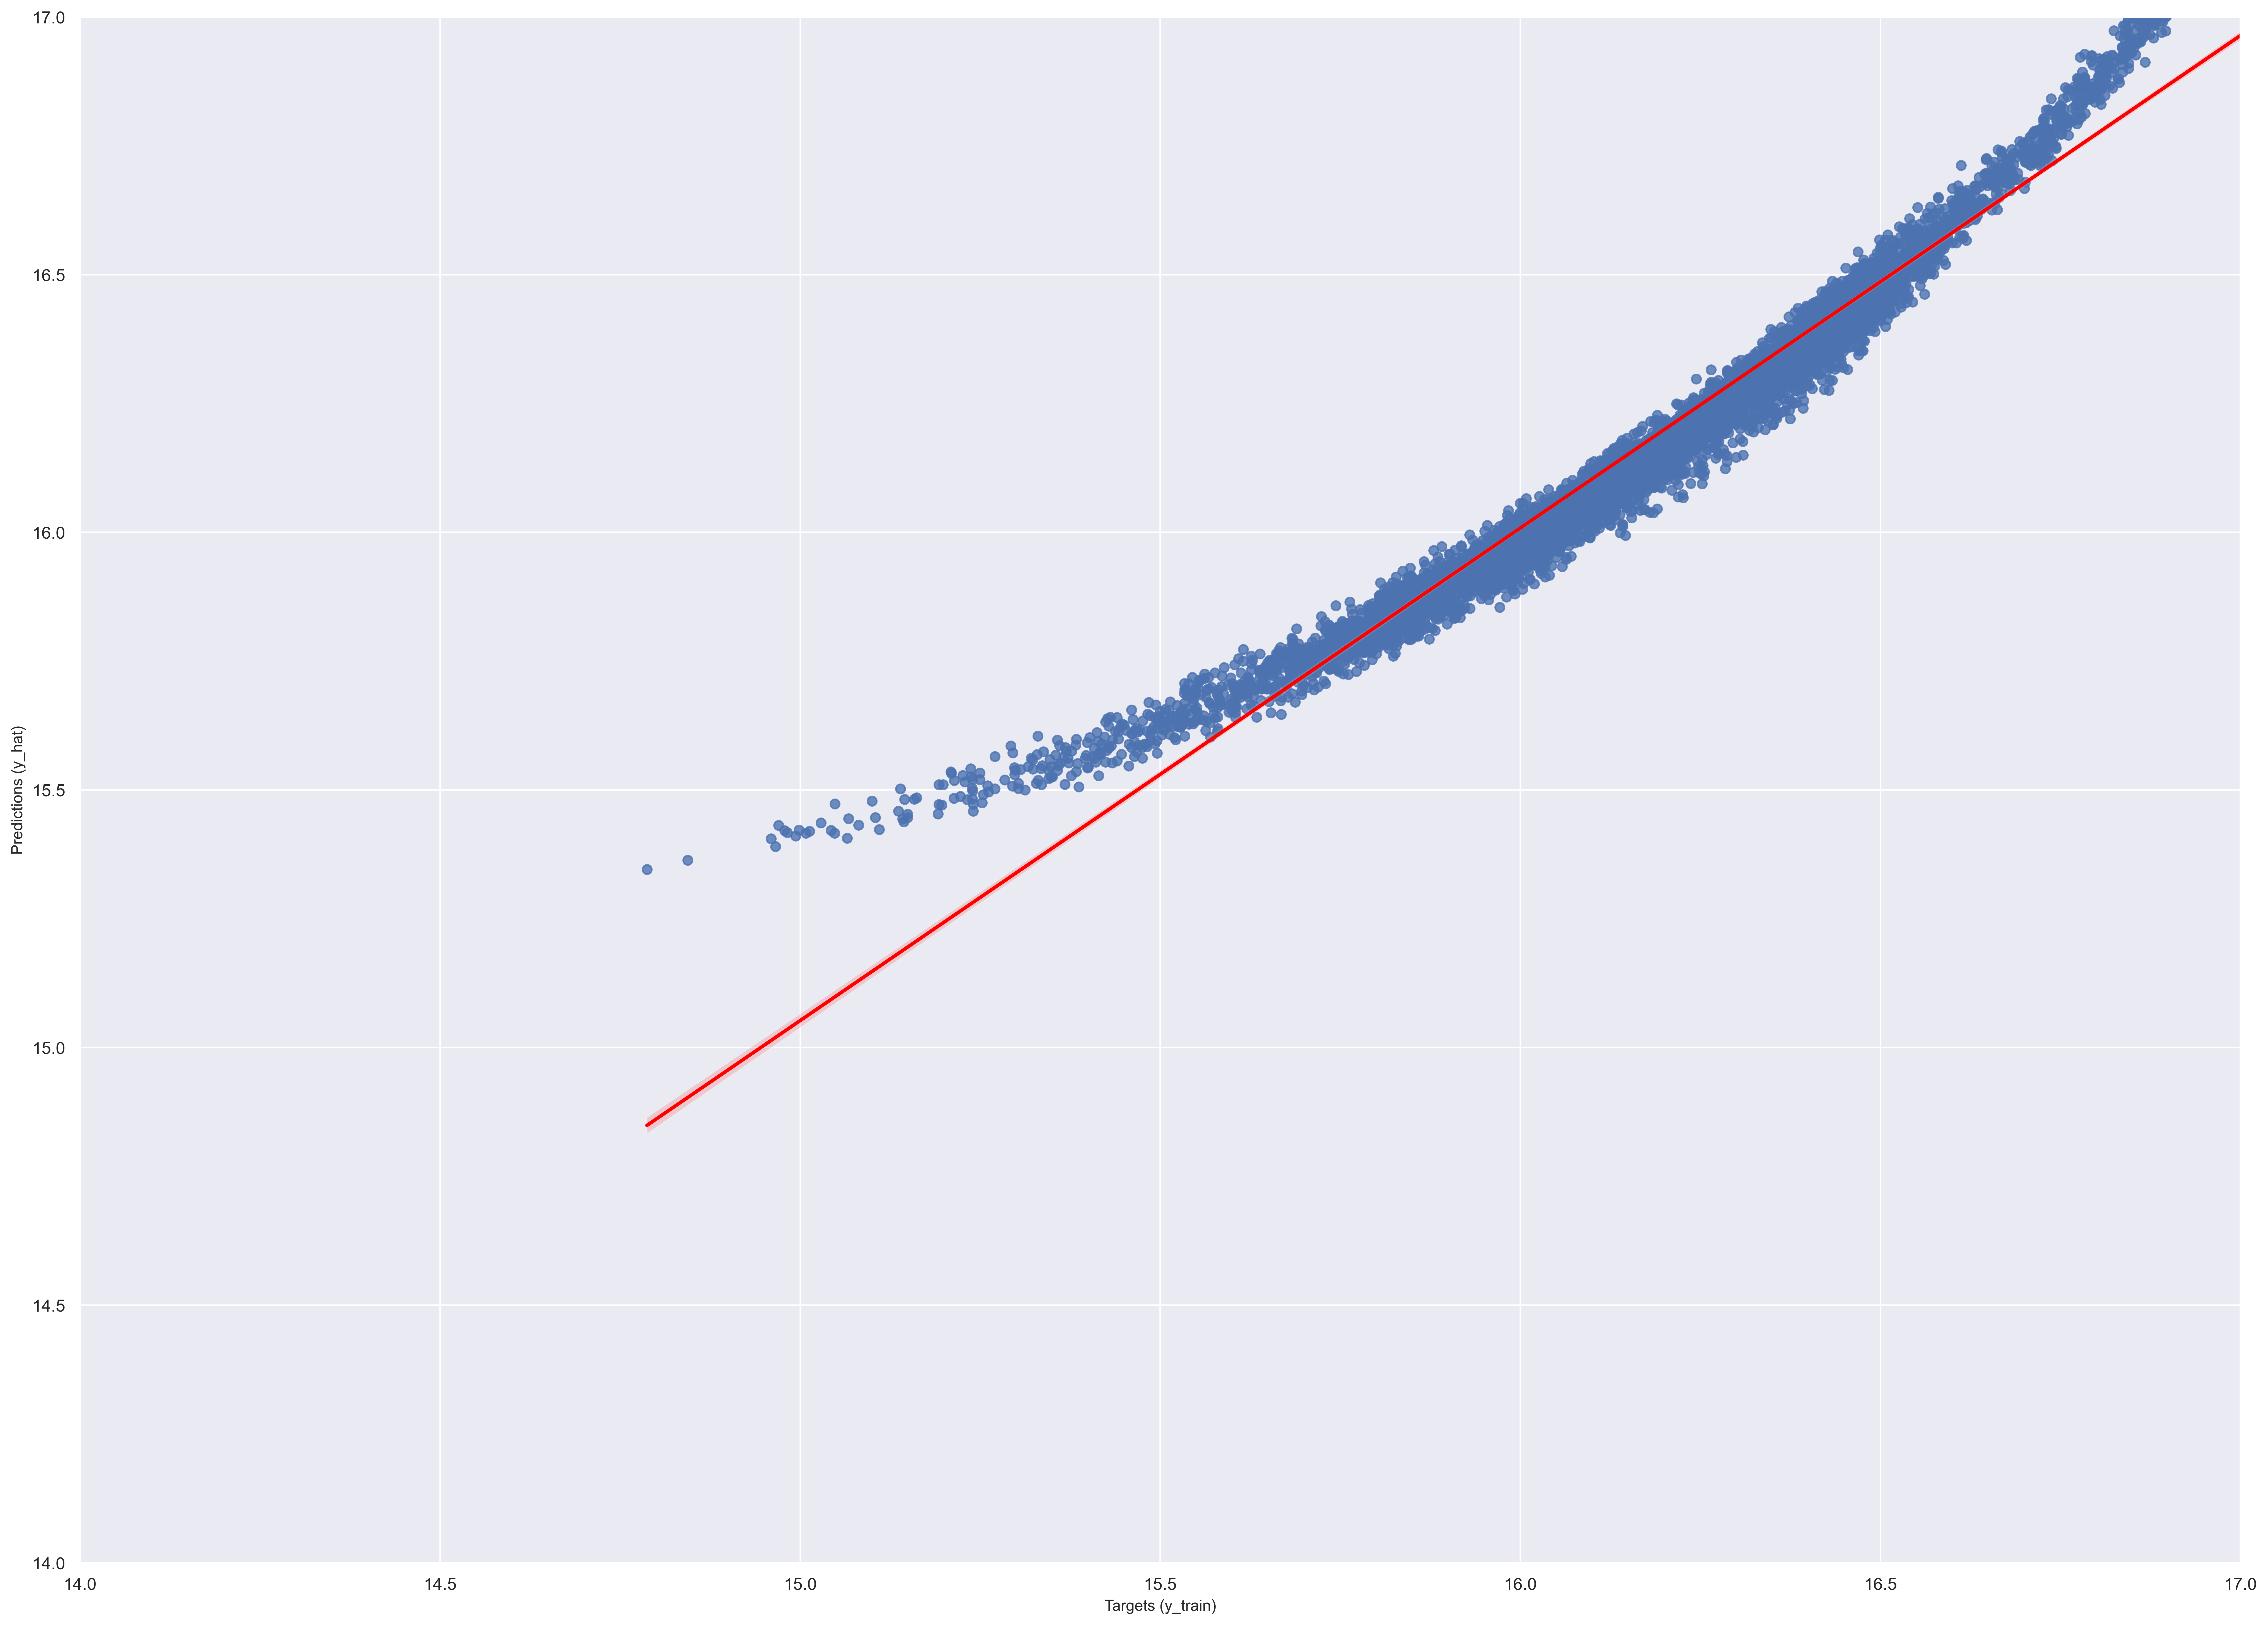

In [97]:
plt.figure(figsize=(25,18),dpi=400)
sns.regplot(x= Y_train,y= Y_pred,line_kws={"color" :'red'},ci=95)
plt.xlabel('Targets (y_train)',size=10)
plt.ylabel('Predictions (y_hat)',size=10)
plt.xlim(14,17)
plt.ylim(14,17)
plt.show()

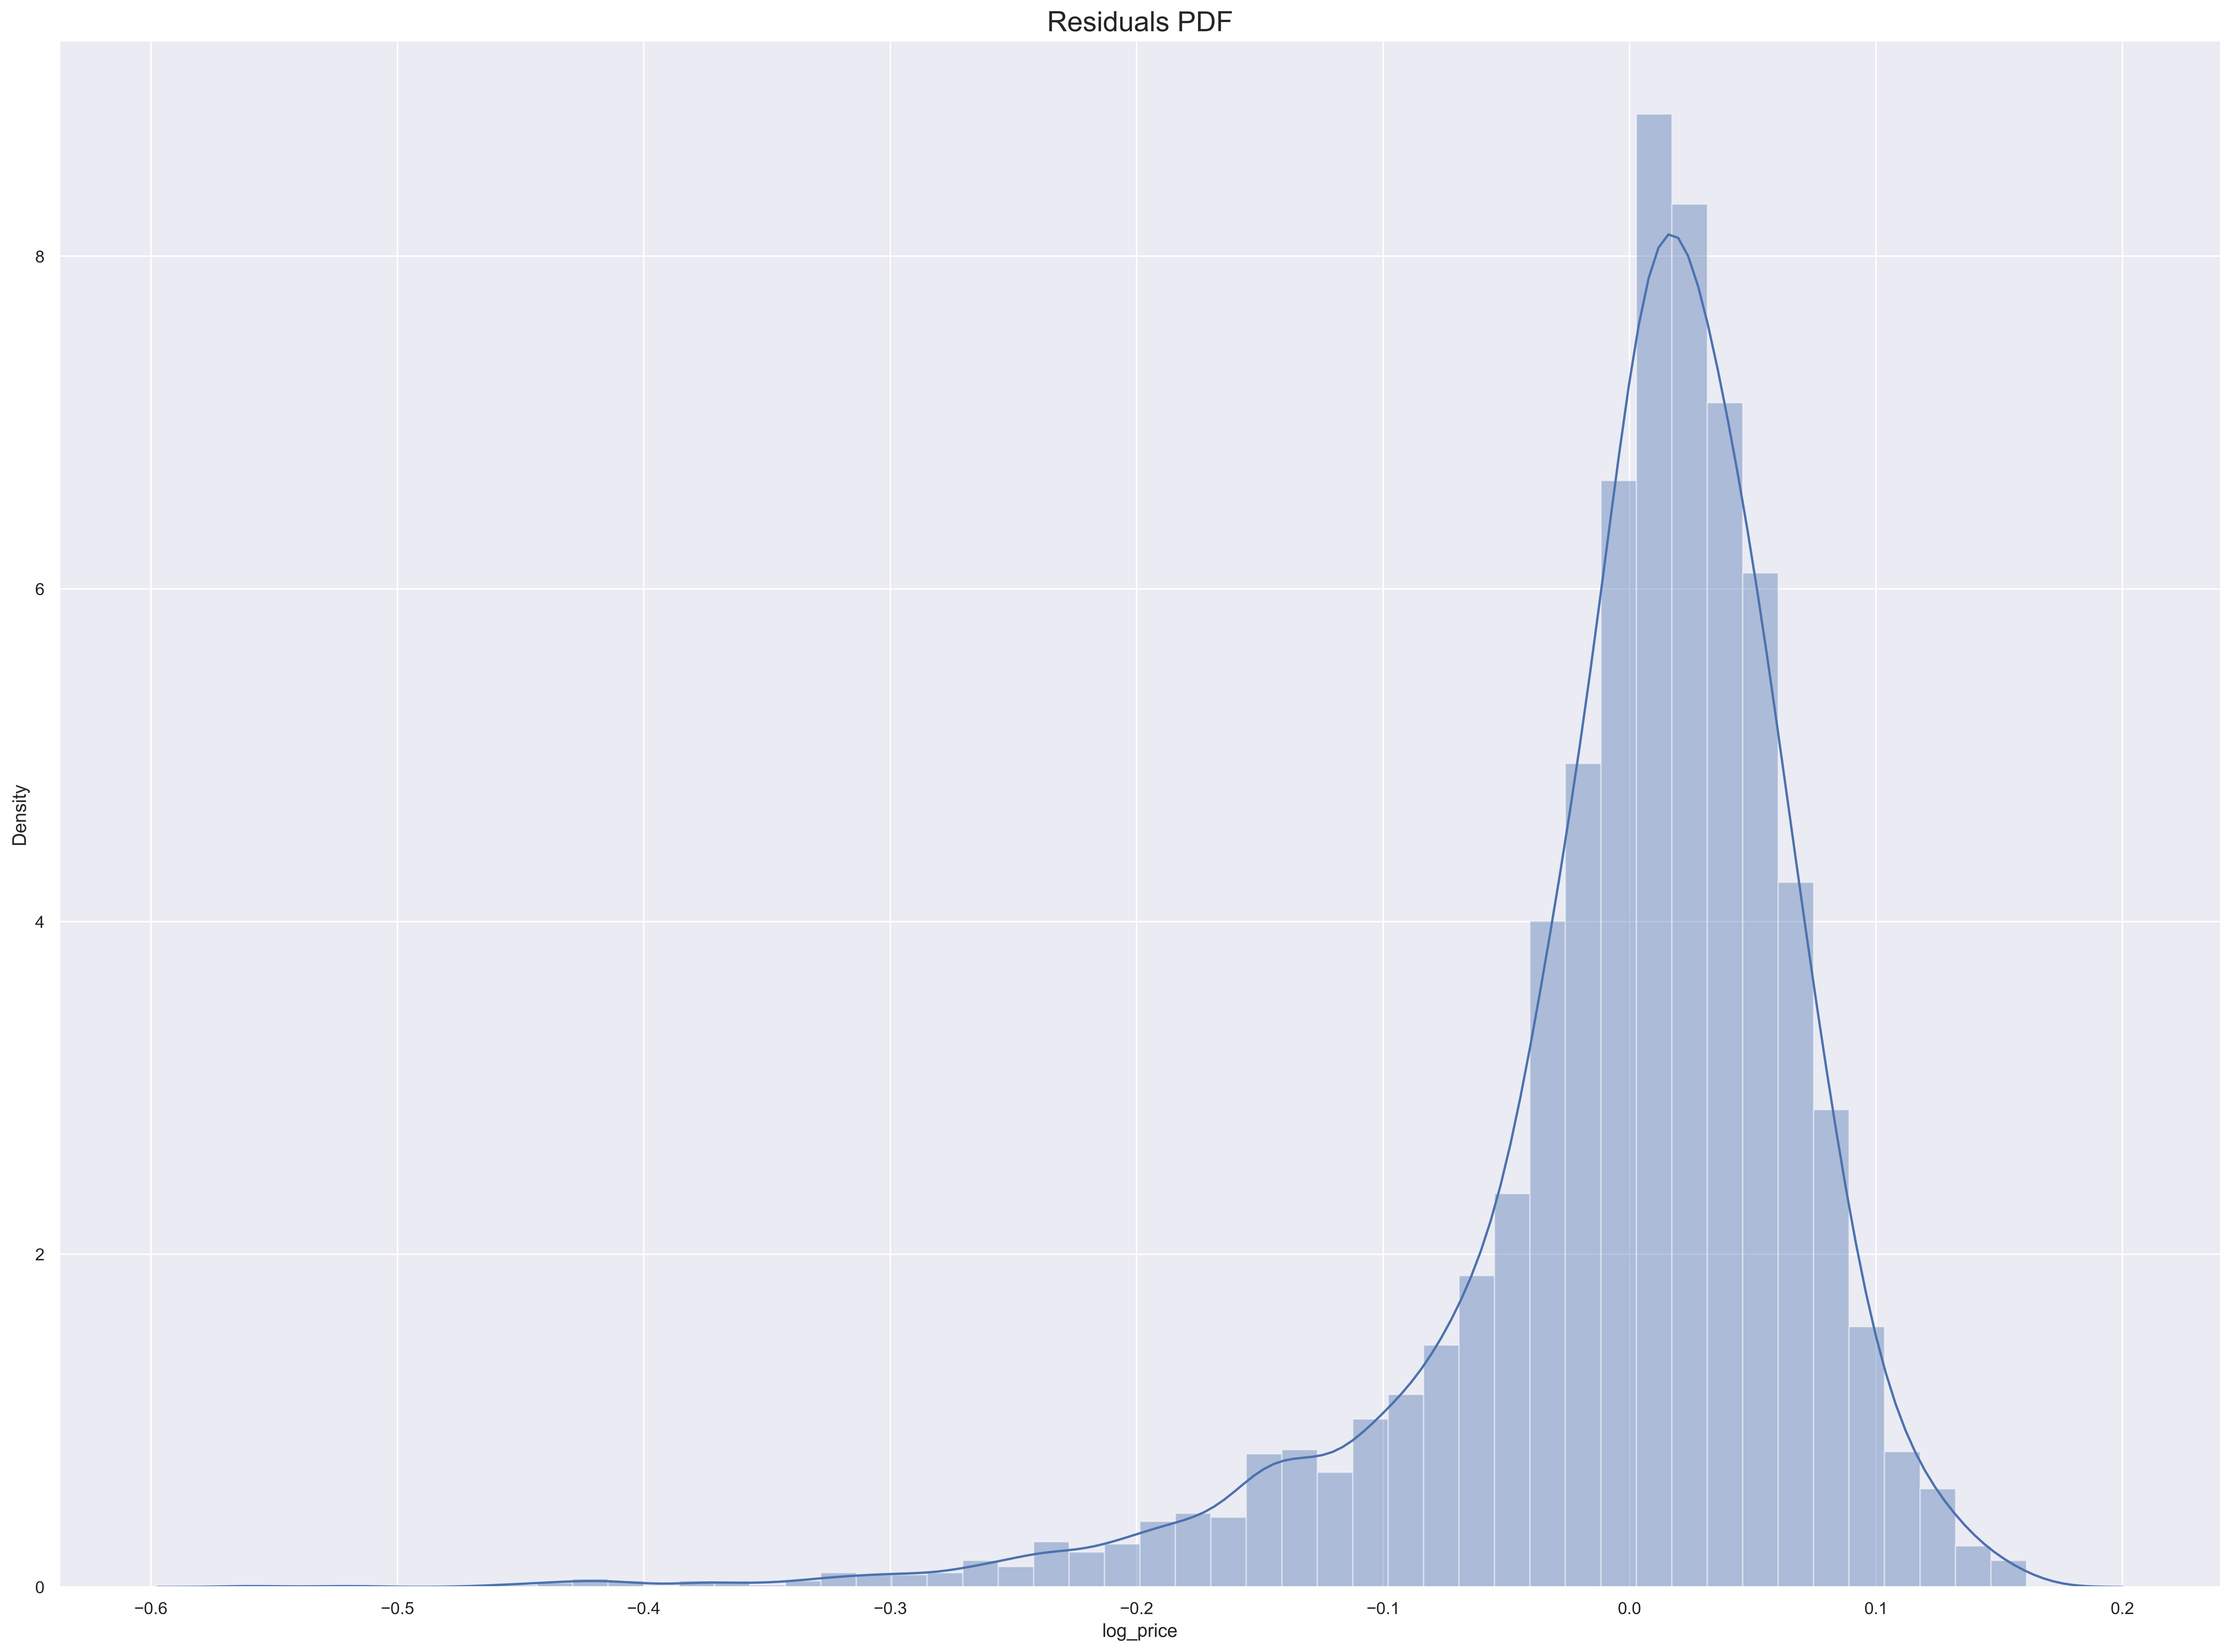

In [98]:
plt.figure(figsize=(25,18),dpi=400)
sns.distplot(Y_train - Y_pred)
plt.title("Residuals PDF", size=18)
plt.show()

In [99]:
# This plot is normally distributed as it should be

In [100]:
reg.score(X_train,Y_train)

0.9558685732159985

In [101]:
reg.coef_

array([-0.00244246,  0.02321897, -0.00102374, -0.01571069,  0.00185142,
        0.03597006, -0.00412916,  0.01477225, -0.01409109, -0.00075712,
       -0.00479768,  0.03733277, -0.00917628, -0.00382296,  0.29399912,
       -0.00921719])

In [102]:
reg_summary = pd.DataFrame(X.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

Features   Weights
0            area -0.002442
1        int_sqft  0.023219
2   dist_mainroad -0.001024
3       n_bedroom -0.015711
4      n_bathroom  0.001851
5          n_room  0.035970
6       sale_cond -0.004129
7      park_facil  0.014772
8       buildtype -0.014091
9   utility_avail -0.000757
10         street -0.004798
11         mzzone  0.037333
12        reg_fee -0.009176
13         commis -0.003823
14    sales_price  0.293999
15   property_age -0.009217

# Testing the model

In [103]:
y_pred_test = reg.predict(X_test)
y_pred_test

array([16.60375278, 16.25036349, 16.44324543, ..., 17.12065499,
       17.132316  , 16.10664182])

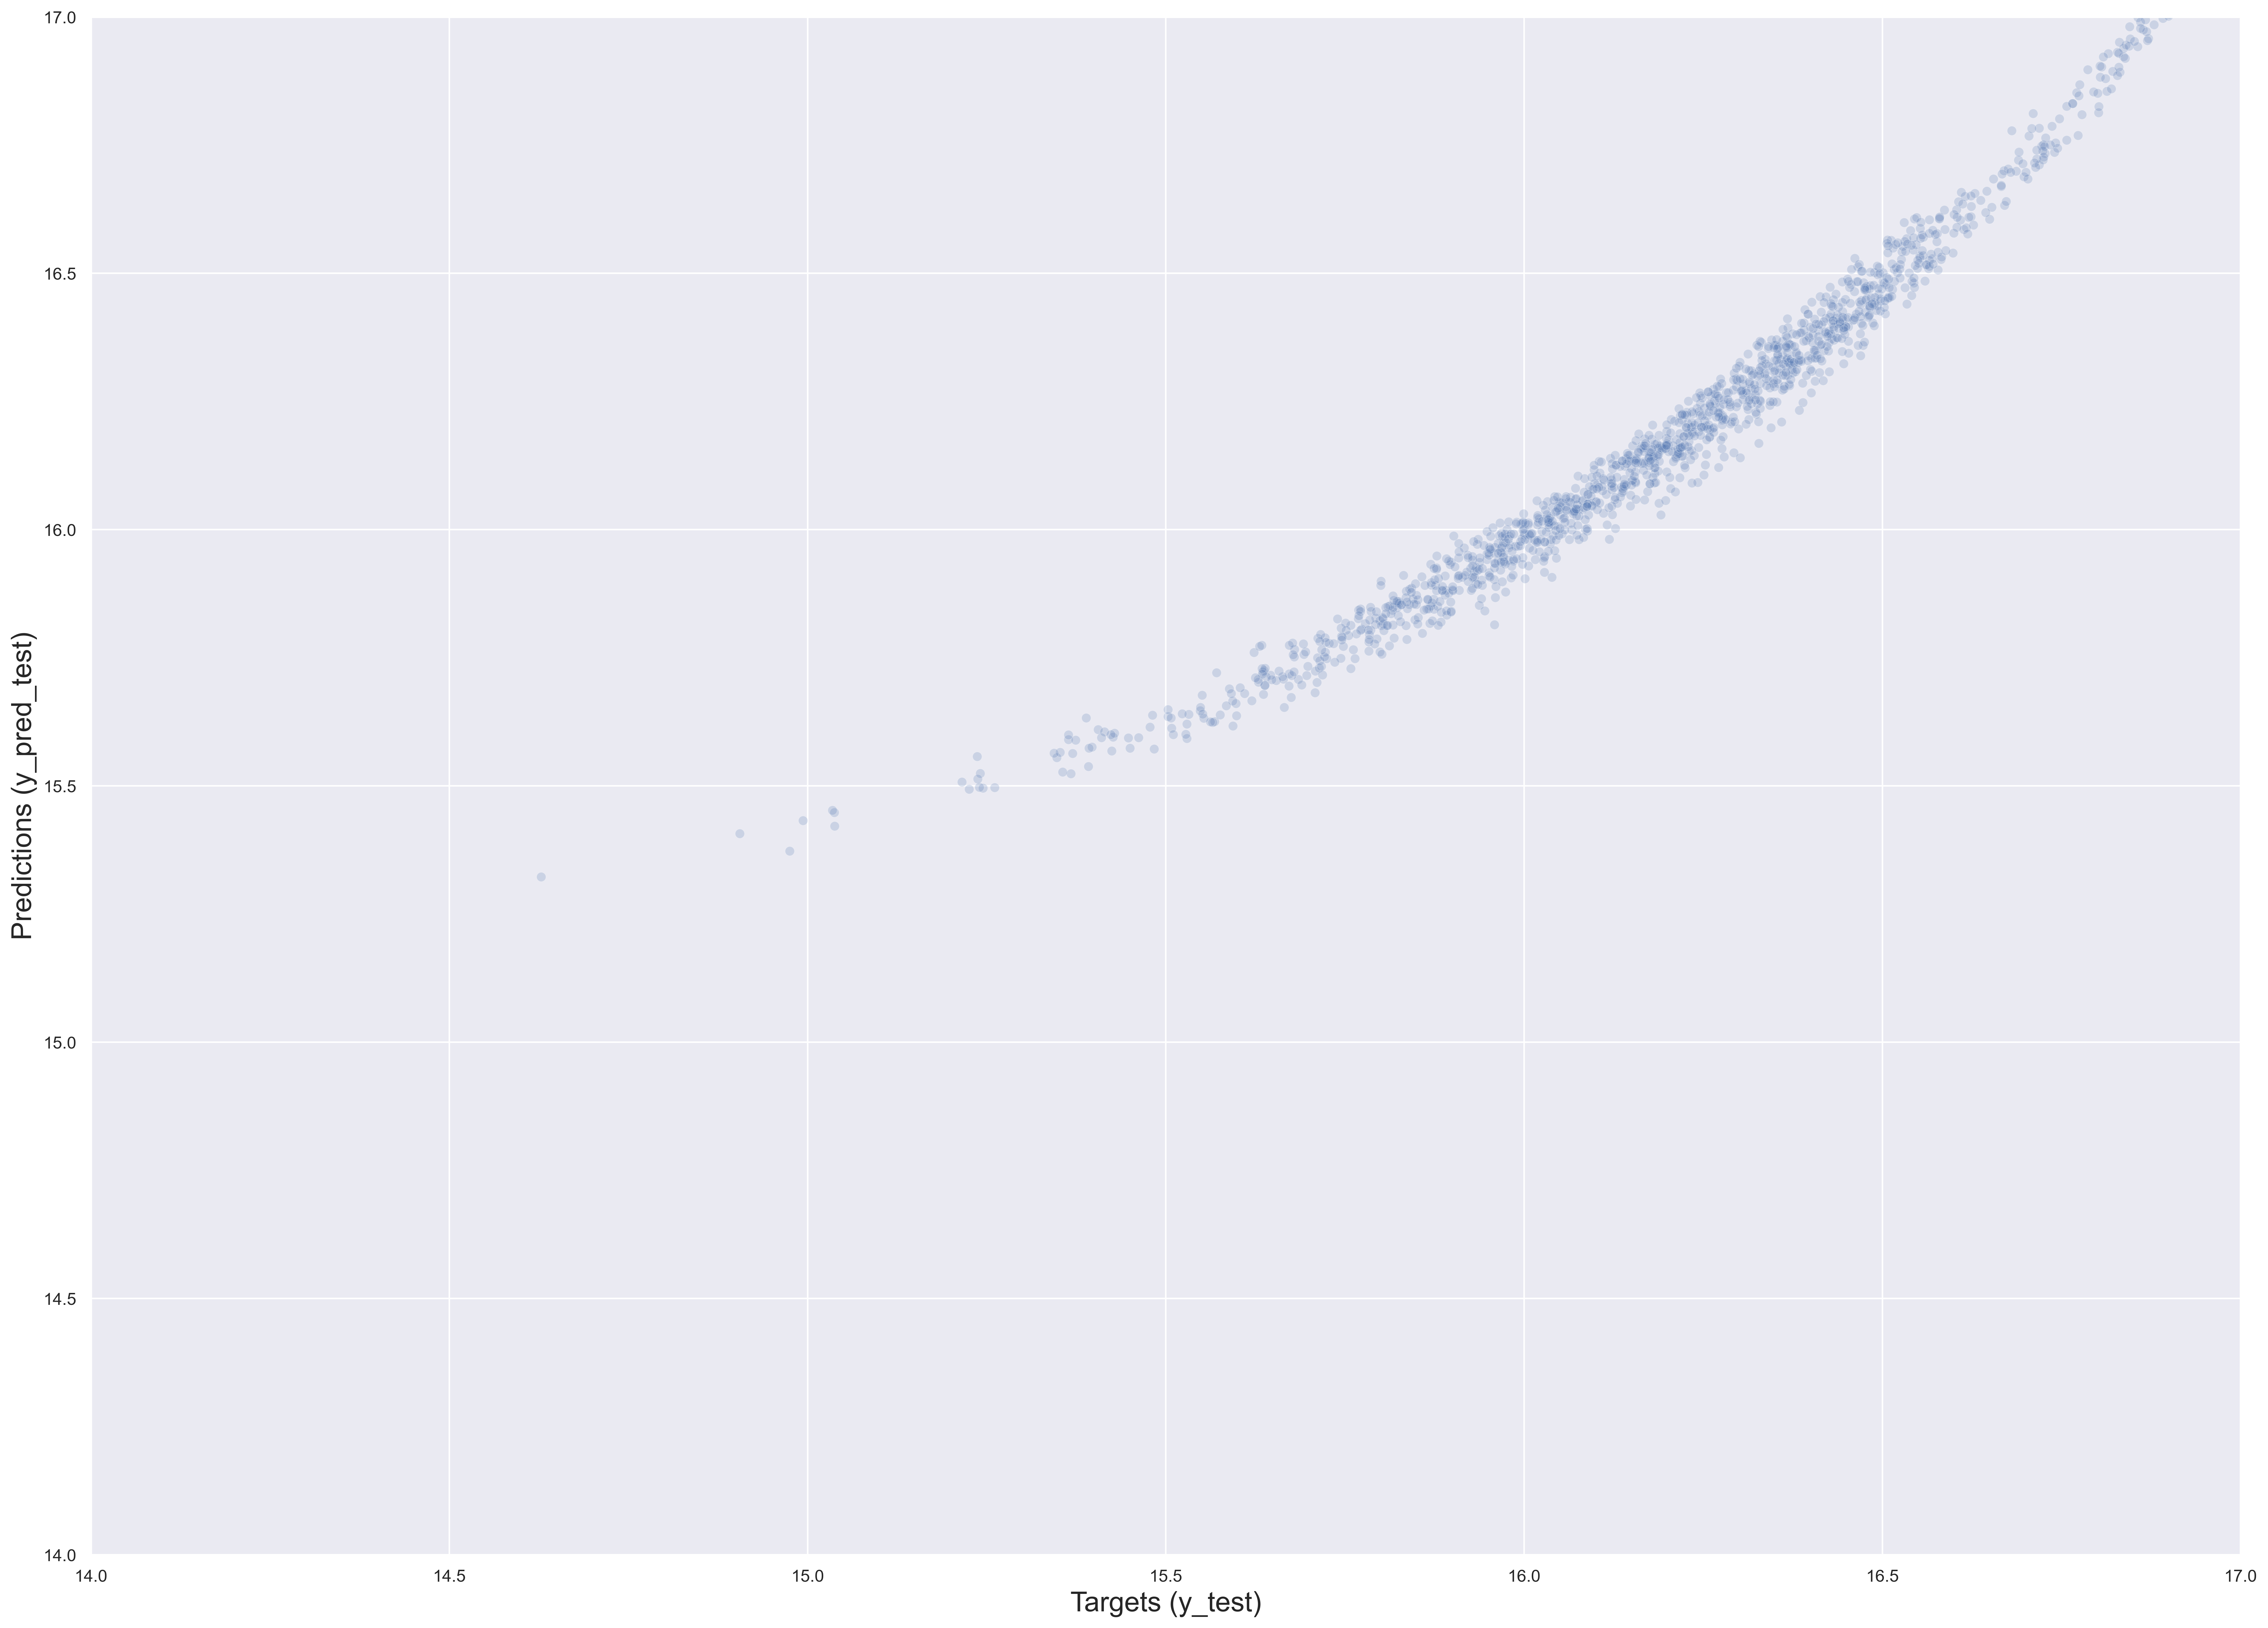

In [104]:
plt.figure(figsize=(25,18),dpi=400)
sns.scatterplot(x = Y_test, y = y_pred_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_pred_test)',size=18)
plt.xlim(14,17)
plt.ylim(14,17)
plt.show()